<a href="https://colab.research.google.com/github/aashishpiitkEigenlytics/document_classification_/blob/main/data_augmentation_doceye_sample_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip -q /content/drive/MyDrive/processed_1_data_doceye.zip

In [ ]:
import numpy as np
import pandas as pd
import os, math, sys
import glob, itertools
import argparse, random

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.models import vgg19
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import save_image, make_grid

import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split

random.seed(42)
import warnings
warnings.filterwarnings("ignore")

import math
from pathlib import Path
from torchsummary import summary
import torchvision
from PIL import Image, ImageOps
from matplotlib.pyplot import figure

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class ImageDataset(Dataset):
  def __init__(self, files):
    #super(ImageDataset, self)

    self.files = files
    self.trans = transforms.Compose([
                                transforms.Grayscale(),
                                transforms.Resize((780,600)), 
                                transforms.ToTensor(),
                                
    ])
    self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                      std=[0.229, 0.224, 0.225])
    
    self.trans2 = transforms.Resize((227,227))

    #self.trans1 = transforms.ToTensor()
  
  def __getitem__(self, index):
    img = Image.open(self.files[index % len(self.files)][0])
    target = self.files[index % len(self.files)][1]
    
    output_dict = {
        'targets' : torch.tensor(target),
        'holistic' : self.create_holistic(img),
    }

    return output_dict
  
  def create_header(self, x):
    # trans1 = transforms.ToTensor()
    x = self.trans(x)

    x = x[:][:, :256, :]
    return self.trans2(x)


  def create_right_half(self, x):
    x = self.trans(x)

    x = x[:][:, 100:-100, -300:]
    return self.trans2(x)
  def create_left_half(self, x):
    x = self.trans(x)

    x = x[:][:, 100:-100, :300]
    return self.trans2(x)
  def create_footer(self, x):
    x = self.trans(x)

    x = x[:][:, -256:, :]
    return self.trans2(x)

  def create_holistic(self, x):
    x = self.trans(x)
    #print(x.shape)  (channels, h, w) not batch_size in dimensions
    x = x.repeat_interleave(3, dim=0)
    return self.normalize(x)

  def __len__(self):
      return len(self.files)


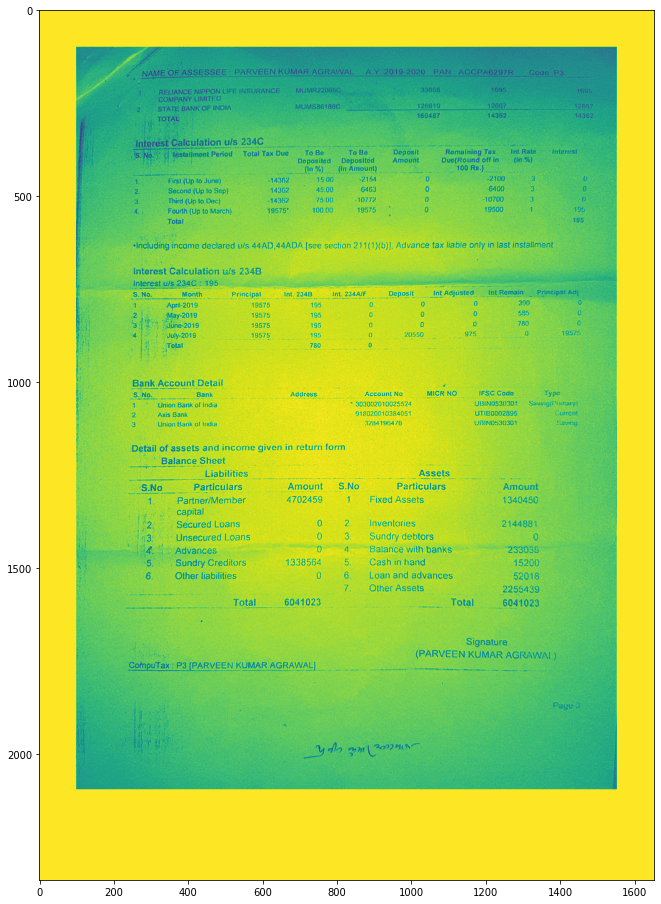

In [ ]:
img = Image.open('/content/content/data1/Sample_Data_For_DocEye/ITR/2098.png')
figure(figsize=(18, 16))
plt.imshow(img)

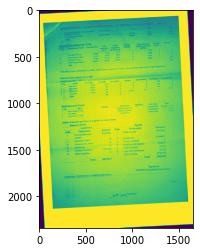

In [ ]:
plt.imshow(torchvision.transforms.functional.rotate(img, angle=3))

In [ ]:
## try to rotate all the four parts by 2-4 degree and then join them to form the original image

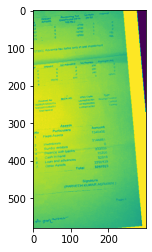

In [ ]:
trans1 = transforms.Compose([
                             transforms.Grayscale(),
                             transforms.Resize((780,600)),
                             torchvision.transforms.RandomRotation(degrees=(5,5)),
                             transforms.ToTensor()
])

imt = trans1(img)
plt.imshow(imt[:, 100:-100, -300:].squeeze().cpu().detach())

In [ ]:
! rm -r /content/content/data1/Sample_Data_For_DocEye/Aadhaar_sample _Images

rm: cannot remove '/content/content/data1/Sample_Data_For_DocEye/Aadhaar_sample': No such file or directory
rm: cannot remove '_Images': No such file or directory


In [ ]:
import re
num = re.compile('\w{1,}')

In [ ]:
from pathlib import Path
trans1 = transforms.Compose([
                             transforms.Grayscale(),
                             transforms.Resize((780,600)),
                             transforms.ToTensor()
])


for path in Path('/content/content/data1/Sample_Data_For_DocEye').rglob("*.png"):#jpeg, jpg, tif, png
    
    s=str(path)
    #c=1
    folder_path = '/'.join(s.split('/')[:-1]) + '/'
    img_name = num.findall(s.split('/')[-1])[0]

    print(folder_path)
    print(img_name)

    for i in range(2, 8):
      imt = trans1(img)
      #trans2 = transforms.RandomRotation(degrees=(5,5))
      imt_ = torchvision.transforms.functional.rotate(imt, angle=i)
      imt__ = torchvision.transforms.functional.rotate(imt, angle=-i)
      print(folder_path + f'{img_name}_mod{i}.png')
      torchvision.utils.save_image(imt_, folder_path + f'{img_name}_mod{i}.png')
      torchvision.utils.save_image(imt__, folder_path + f'{img_name}_mod{i}{i}.png')
    
    

      #imt_.save(folder_path + f'{img_name}_mod{i}.png')

In [ ]:
! rm -r /content/content